# Some visualizations and insights for Kerwa Lake/Dam

**REFERENCE:** 
Rishita Bansal Notebook  https://colab.research.google.com/drive/1A7huPZio1XkNEvz1K2r4urM5AL360xPT?usp=sharing#scrollTo=CbSgt27HgPeX 

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Load Data

In [2]:
df_temp = pd.read_csv('Kerwa_Temperature.csv')
df_ch = pd.read_csv('Kerwa_Chlorophyll.csv')
df_do = pd.read_csv('Kerwa_Dissolved Oxygen.csv')
df_ph = pd.read_csv('Kerwa_pH.csv')
df_tb = pd.read_csv('Kerwa_Turbidity.csv')
df_sal = pd.read_csv('Kerwa_Salinty.csv')

In [3]:
df_dom1 = pd.read_csv('Kerwa_Dissolved Organic Matter_2018-01-01__2018-05-01.csv')
df_dom2 = pd.read_csv('Kerwa_Dissolved Organic Matter_2018-05-01__2018-06-01.csv')
df_dom3 = pd.read_csv('Kerwa_Dissolved Organic Matter_2018-06-01__2018-08-01.csv')
df_dom4 = pd.read_csv('Kerwa_Dissolved Organic Matter_2018-08-01__2018-11-01.csv')
df_dom5 = pd.read_csv('Kerwa_Dissolved Organic Matter_2018-11-01__2019-05-01.csv')
df_dom6 = pd.read_csv('Kerwa_Dissolved Organic Matter_2019-05-01__2019-08-01.csv')
df_dom7 = pd.read_csv('Kerwa_Dissolved Organic Matter_2019-08-01__2021-02-01.csv')
df_dom8 = pd.read_csv('Kerwa_Dissolved Organic Matter_2021-02-01__2022-09-01.csv')
df_dom9 = pd.read_csv('Kerwa_Dissolved Organic Matter_2022-09-01__2023-01-01.csv')
df_dom = pd.concat([df_dom1,df_dom2,df_dom3,
                        df_dom4,df_dom5,df_dom6,
                        df_dom7,df_dom8,df_dom9],axis=0)

In [4]:
df_sm1 = pd.read_csv('Kerwa_Suspended Matter_2018-01-01_2018-05-01.csv')
df_sm2 = pd.read_csv('Kerwa_Suspended Matter_2018-05-01__2018-06-01.csv')
df_sm3 = pd.read_csv('Kerwa_Suspended Matter_2018-06-01__2018-07-01.csv')
df_sm4 = pd.read_csv('Kerwa_Suspended Matter_2018-07-01__2019-01-01.csv')
df_sm5 = pd.read_csv('Kerwa_Suspended Matter_2019-01-01__2019-05-01.csv')
df_sm6 = pd.read_csv('Kerwa_Suspended Matter_2019-05-01__2020-01-01.csv')
df_sm7 = pd.read_csv('Kerwa_Suspended Matter_2020-01-01__2021-07-01.csv')
df_sm8 = pd.read_csv('Kerwa_Suspended Matter_2021-07-01__2023-01-01.csv')
df_sm = pd.concat([df_sm1,df_sm2,df_sm3,
                        df_sm4,df_sm5,df_sm6,
                        df_sm7,df_sm8],axis=0)

# Create Year, Month and Day Columns

In [5]:
def set_dates(df_in):
    df = df_in.copy()
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    df['Year'] = pd.to_datetime(df['Date']).dt.strftime('%Y')
    df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%m')
    df['Day'] = pd.to_datetime(df['Date']).dt.strftime('%d')
    df=df.set_index("Date")
    return df

In [6]:
df_temp = set_dates(df_temp)
df_ph = set_dates(df_ph)
df_tb = set_dates(df_tb)
df_ch = set_dates(df_ch)
df_do = set_dates(df_do)
df_sal = set_dates(df_sal)
df_sm = set_dates(df_sm)
df_dom = set_dates(df_dom)

# Data Analysis

## Histplots with zone divisions

### Suspended Matter

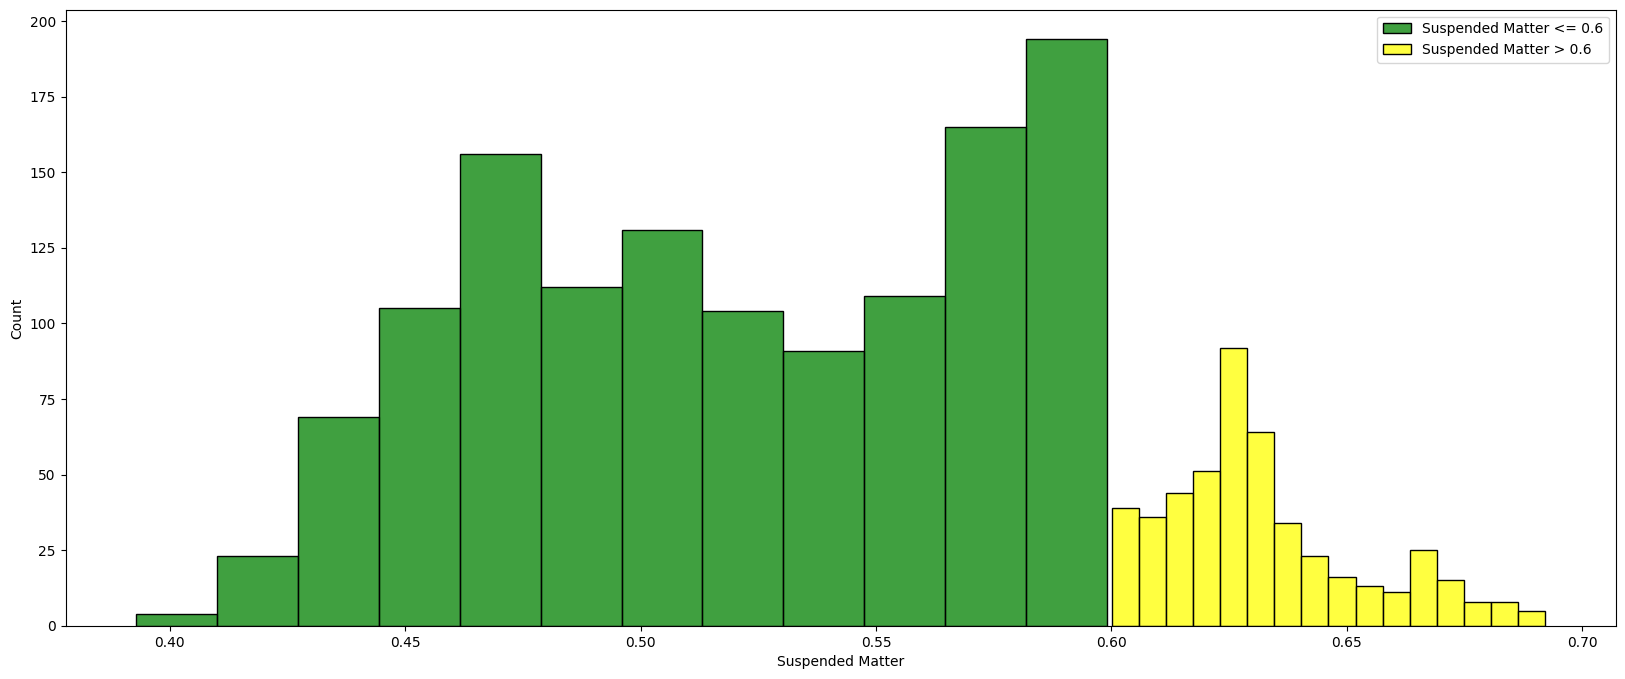

In [7]:
df = df_sm.copy()
limit = 0.600
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Suspended Matter', data=df[df['Suspended Matter'] <= limit], color='green', label=f'Suspended Matter <= {limit}')
sns.histplot(x='Suspended Matter', data=df[df['Suspended Matter'] > limit], color='yellow', label=f'Suspended Matter > {limit}', ax=ax)
ax.set_xlabel('Suspended Matter')
ax.set_ylabel('Count')
ax.legend()
plt.show()

Most of data for Suspended Matter is good zone with some data in needs treatment zone

### Dissolved Organic Matter

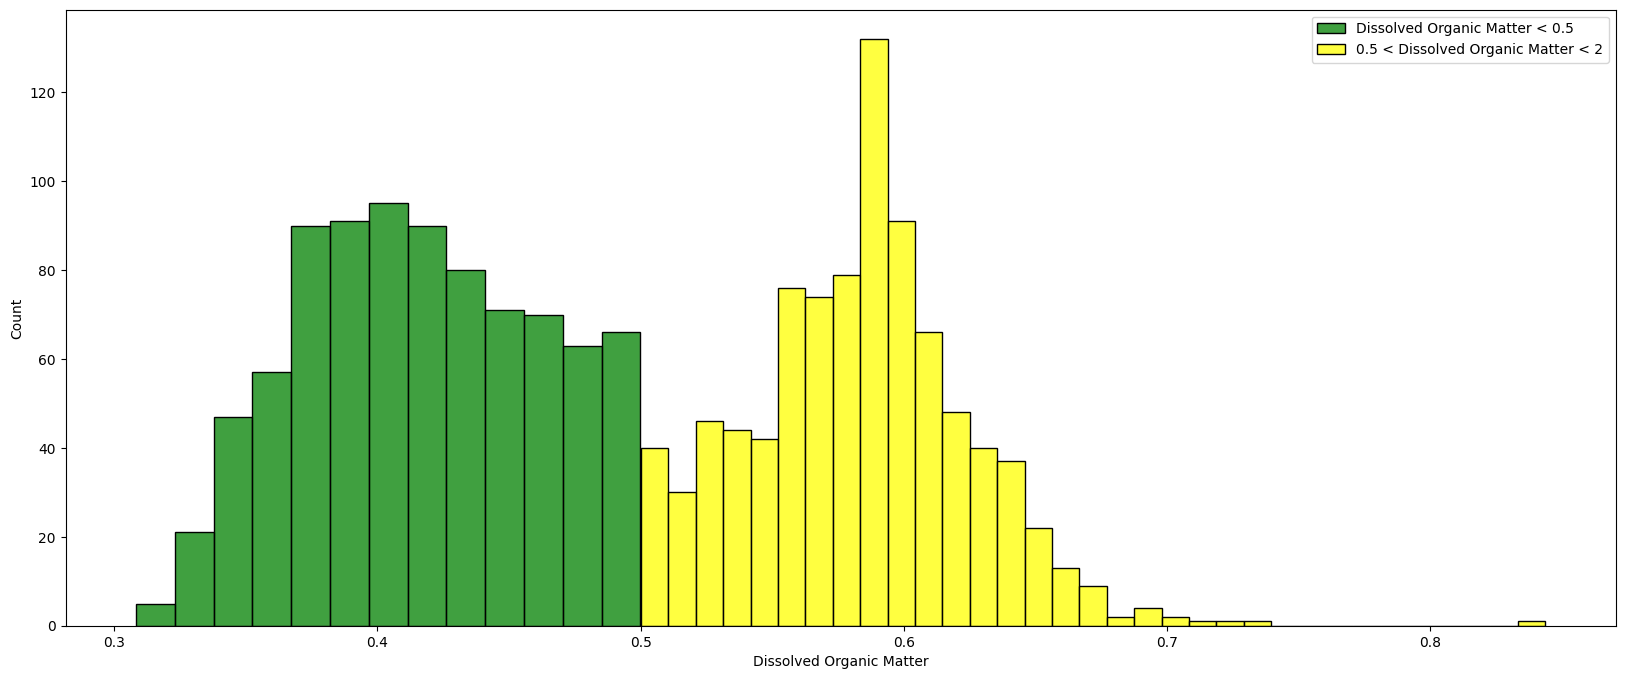

In [8]:
df= df_dom.copy()
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Dissolved Organic Matter', data=df[(df['Dissolved Organic Matter'] <0.5 )], color='green', label='Dissolved Organic Matter < 0.5')
sns.histplot(x='Dissolved Organic Matter', data=df[(df['Dissolved Organic Matter'] >= 0.5) & (df['Dissolved Organic Matter'] <=2)], color='yellow', label='0.5 < Dissolved Organic Matter < 2')
sns.histplot(x='Dissolved Organic Matter', data=df[(df['Dissolved Organic Matter'] > 2 )], color='red', label='Dissolved Organic Matter >= 2')
ax.set_xlabel('Dissolved Organic Matter')
ax.set_ylabel('Count')
ax.legend()
plt.show()

Almost 50% of the data for Dissolved Organic Matter is good zone and the other half is in needs treatment zone

### Temperature

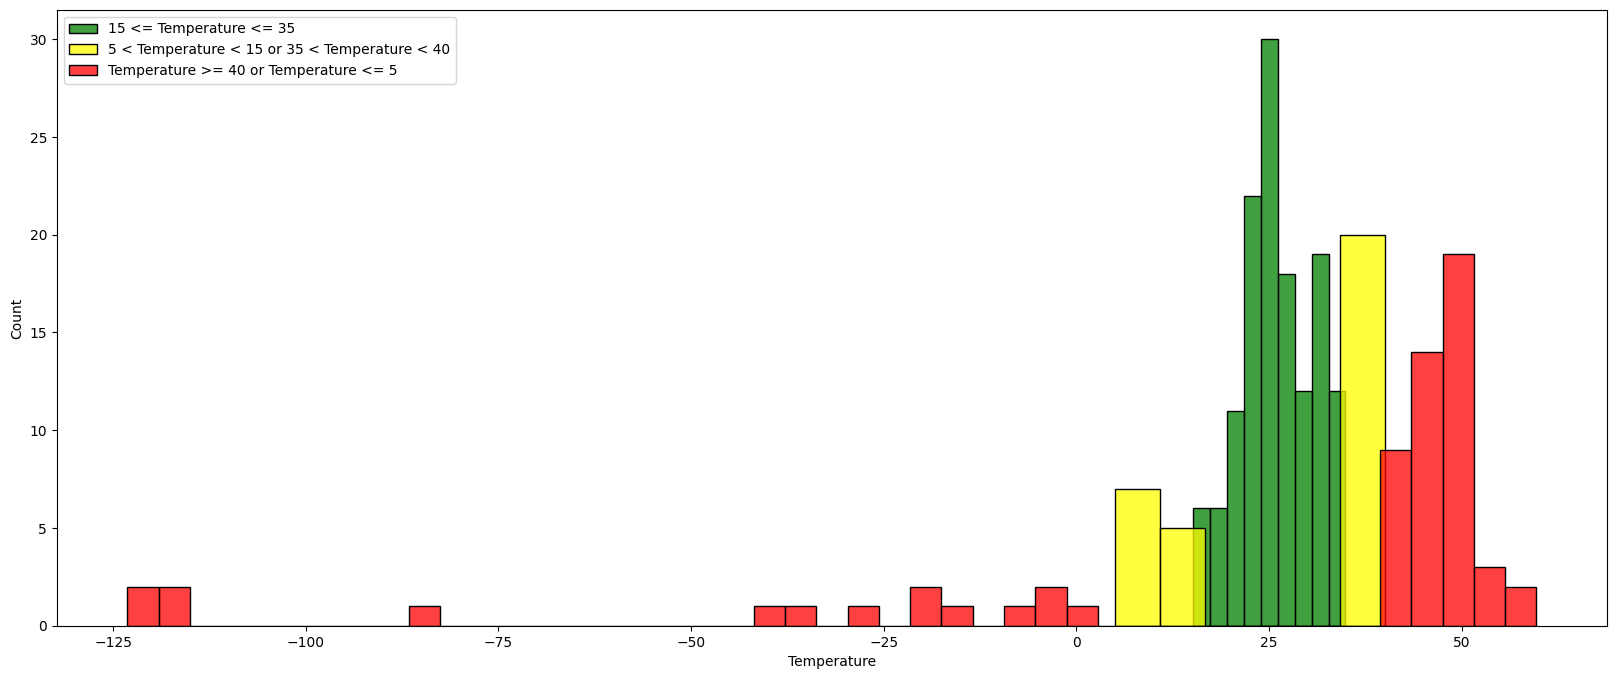

In [9]:
df = df_temp
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Temperature', data=df[(df['Temperature'] <= 35) & (df['Temperature'] >= 15)], color='green', label='15 <= Temperature <= 35')
sns.histplot(x='Temperature', data=df[((df['Temperature'] > 35) & (df['Temperature'] < 40)) | ((df['Temperature'] < 15)&(df['Temperature'] > 5))], color='yellow', label='5 < Temperature < 15 or 35 < Temperature < 40')
sns.histplot(x='Temperature', data=df[(df['Temperature'] >= 40) | (df['Temperature'] <= 5)], color='red', label='Temperature >= 40 or Temperature <= 5')
ax.set_xlabel('Temperature')
ax.set_ylabel('Count')
ax.legend()
plt.show()

Temperature presents clearly measurement error with too much negative values. Apart from possible outliers the distribution is almost equaly divided in the quality zones.


### Chlorophyll

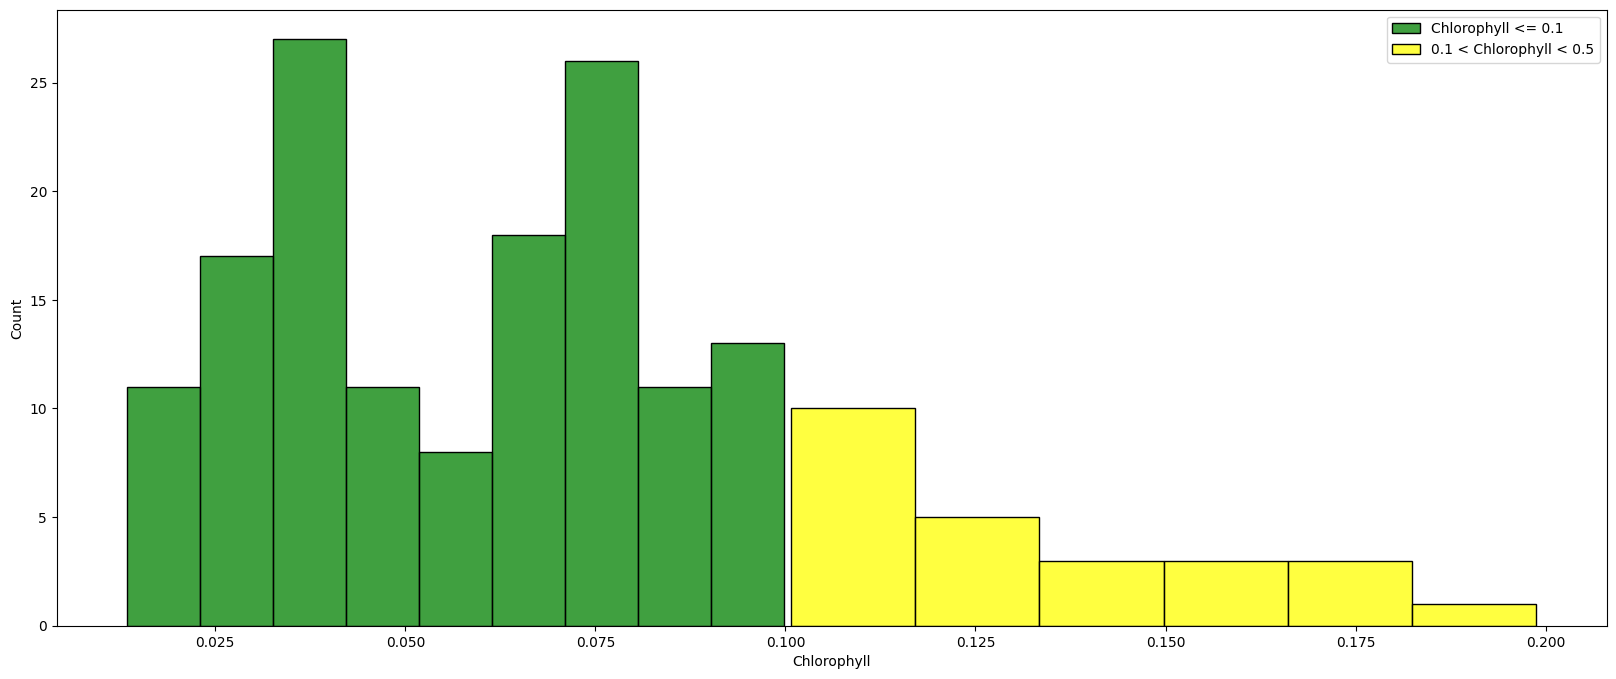

In [10]:
df = df_ch.copy()
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Chlorophyll', data=df[(df['Chlorophyll'] <= 0.1) & (df['Chlorophyll'] >= -0.1)], color='green', label='Chlorophyll <= 0.1')
sns.histplot(x='Chlorophyll', data=df[(df['Chlorophyll'] > 0.1) & (df['Chlorophyll'] < 0.5)], color='yellow', label='0.1 < Chlorophyll < 0.5')
sns.histplot(x='Chlorophyll', data=df[(df['Chlorophyll'] >= 0.5)], color='red', label='Chlorophyll >= 0.5',bins=np.arange(0.5, 1, 0.01))
ax.set_xlabel('Chlorophyll')
ax.set_ylabel('Count')
ax.legend()
plt.show()

Chlorophyll is almost 50% divided between good and needs treatment zones

### Turbidity

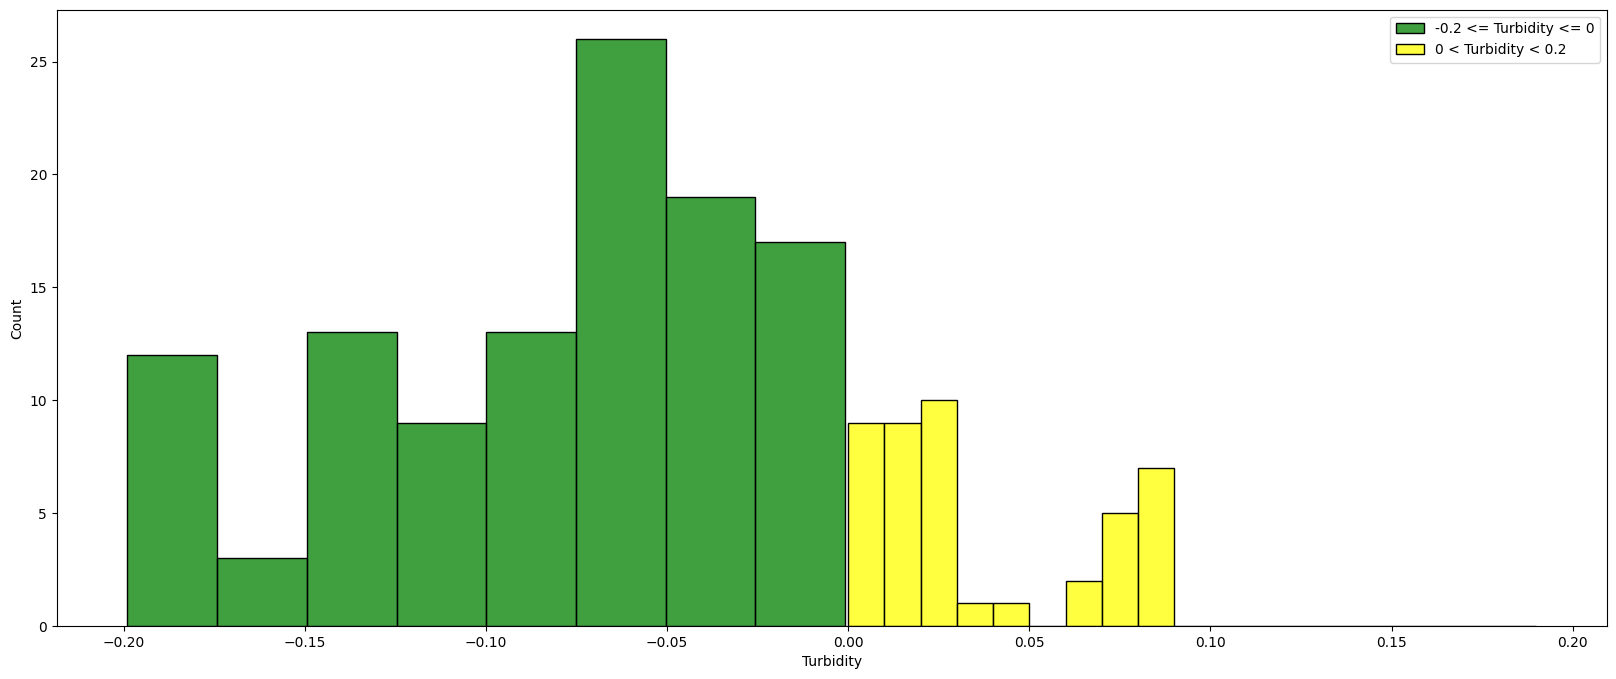

In [11]:
df = df_tb.copy()
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Turbidity', data=df[(df['Turbidity'] <= 0) & (df['Turbidity'] >= -0.2)], color='green', label='-0.2 <= Turbidity <= 0')
sns.histplot(x='Turbidity', data=df[(df['Turbidity'] > 0) & (df['Turbidity'] < 0.2)], color='yellow', label='0 < Turbidity < 0.2',bins=np.arange(0, 0.2, 0.01))
ax.set_xlabel('Turbidity')
ax.set_ylabel('Count')
ax.legend()
plt.show()

Most of the data for Turbidity is in good zone

### Salinity

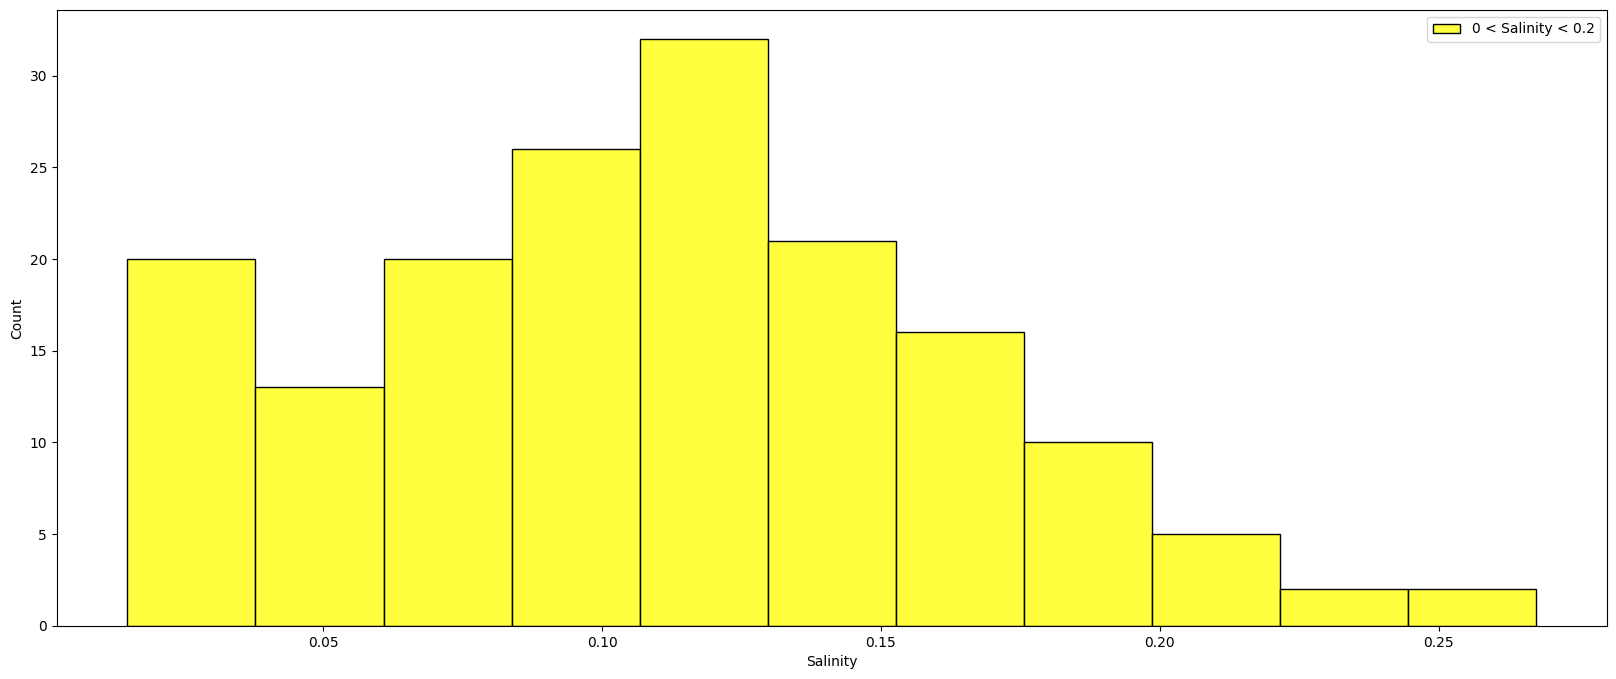

In [12]:
df = df_sal.copy()
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Salinity', data=df[(df['Salinity'] >= 0) & (df['Salinity'] <=1)], color='yellow', label='0 < Salinity < 0.2')
sns.histplot(x='Salinity', data=df[(df['Salinity'] < 0)], color='red', label='Salinity < 0',bins=np.arange(-1, 0, 0.01))
ax.set_xlabel('Salinity')
ax.set_ylabel('Count')
ax.legend()
plt.show()

Salinity values are totally distributed in needs treatment zone

### Dissolved Oxygen

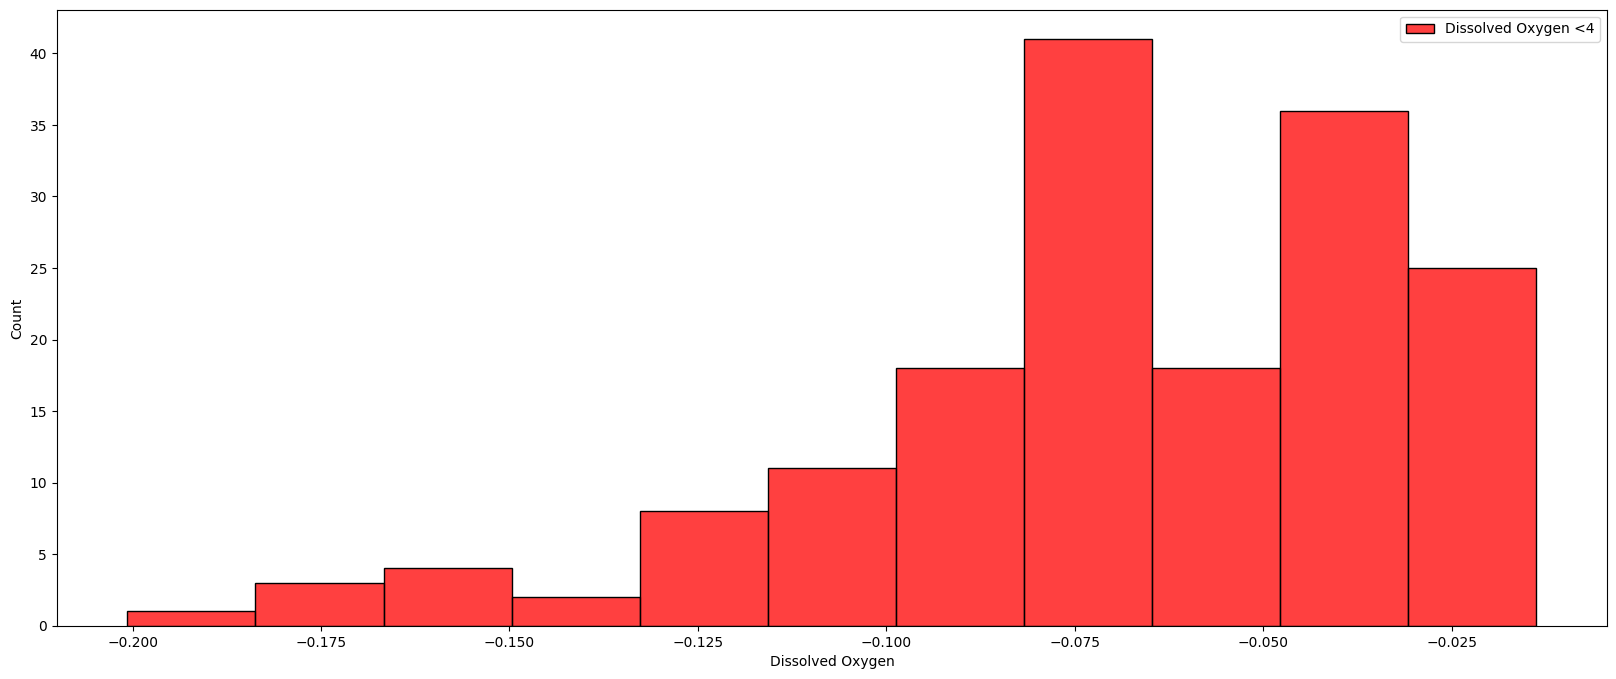

In [13]:
df = df_do.copy()
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Dissolved Oxygen', data=df[(df['Dissolved Oxygen'] >6.5 )], color='green', label='Dissolved Oxygen >6.5')
sns.histplot(x='Dissolved Oxygen', data=df[(df['Dissolved Oxygen'] >= 4) & (df['Dissolved Oxygen'] <=6.5)], color='yellow', label='4 < Dissolved Oxygen < 6.5')
sns.histplot(x='Dissolved Oxygen', data=df[(df['Dissolved Oxygen'] <4 )], color='red', label='Dissolved Oxygen <4')
ax.set_xlabel('Dissolved Oxygen')
ax.set_ylabel('Count')
ax.legend()
plt.show()

Dissolved Oxygen presented all negative values (mesuement error??) and is totally distributed in the poor quality zone.

### pH

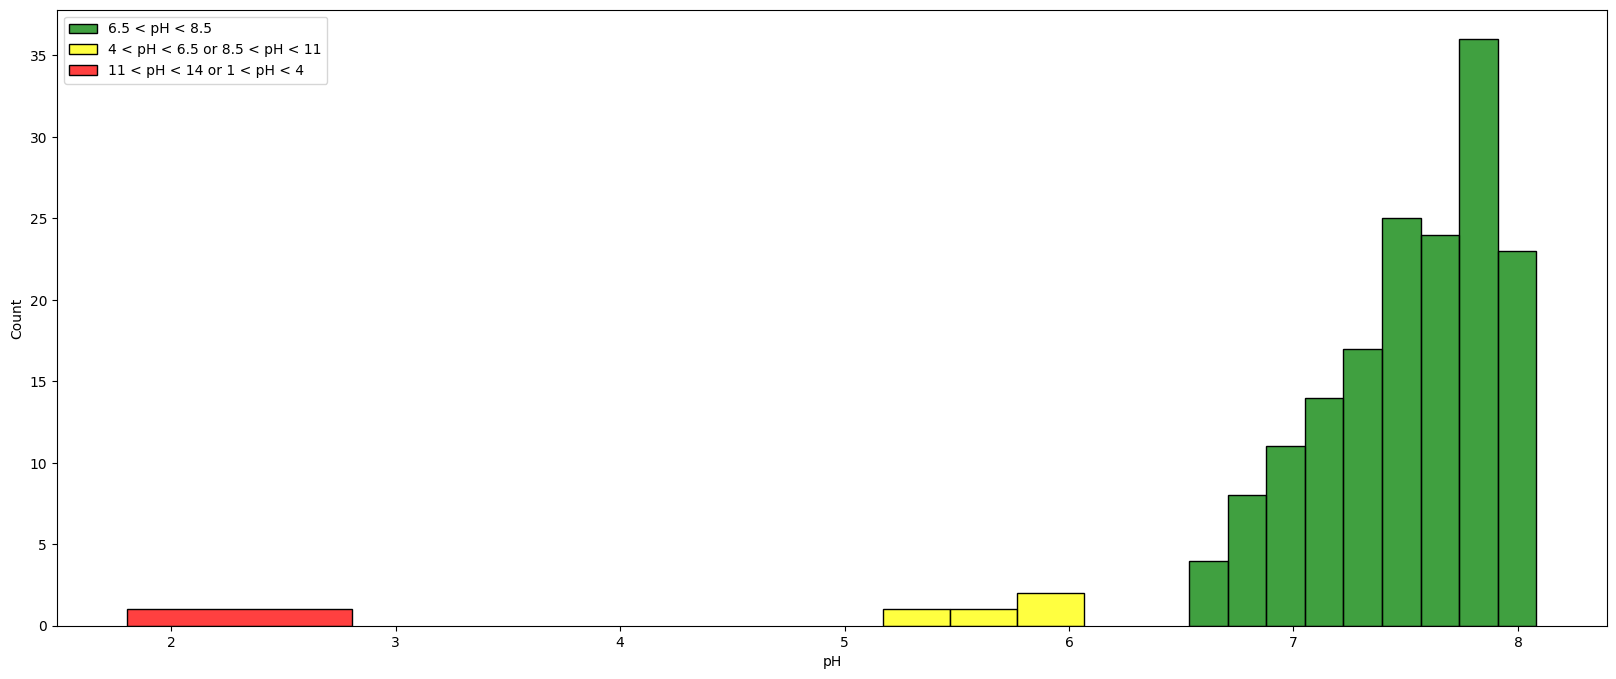

In [14]:
df = df_ph.copy()
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='pH', data=df[(df['pH'] >= 6.5) & (df['pH'] <=8.5)], color='green', label='6.5 < pH < 8.5')
sns.histplot(x='pH', data=df[((df['pH'] > 4) & (df['pH'] < 6.5)) | ((df['pH'] < 11)&(df['pH'] > 8.5))], color='yellow', label='4 < pH < 6.5 or 8.5 < pH < 11')
sns.histplot(x='pH', data=df[((df['pH'] > 11) & (df['pH'] < 14)) | ((df['pH'] < 4)&(df['pH'] > 1))], color='red', label='11 < pH < 14 or 1 < pH < 4')
ax.set_xlabel('pH')
ax.set_ylabel('Count')
ax.legend()
plt.show()

Most of the data for pH is in the good zone, with som high acidity values (measurement errors?)

# Boxplots

In [15]:
def plot_box(df, column):
    fig = px.box(df, y=column)
    plt.figsize=(18,4)
    fig.show()
    #fig.show("png")

In [16]:
plot_box(df_temp,'Temperature')
plot_box(df_do,'Dissolved Oxygen')
plot_box(df_tb,'Turbidity')
plot_box(df_ph,'pH')
plot_box(df_sal,'Salinity')
plot_box(df_ch,'Chlorophyll')
plot_box(df_dom,'Dissolved Organic Matter')
plot_box(df_sm,'Suspended Matter')

Most of the outliers are present in Temperature, pH and Dissolved Oxygen, probably due to measurement errors.

# Yearwise Boxplots

In [17]:
  
def plot_box_y(df,column):
    fig = px.box(df, x="Year", y=column)
    #fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
    fig.show()
    #fig.show("png")

In [18]:
plot_box_y(df_temp,'Temperature')
plot_box_y(df_do,'Dissolved Oxygen')
plot_box_y(df_tb,'Turbidity')
plot_box_y(df_ph,'pH')
plot_box_y(df_sal,'Salinity')
plot_box_y(df_ch,'Chlorophyll')
plot_box_y(df_dom,'Dissolved Organic Matter')
plot_box_y(df_sm,'Suspended Matter')

Most of the boxplots in yearly basis seems to have constant median values and distribution, except for Chlorophyll, Salinity, Turbidity and Dissolved Oxygen that present different trends for 2019, 2020 and 2021

## Conclusions about outliers

The data for Kerwa Dam presented lot of outliers (or weird values) in the data collection. Specially for Temperature, pH and Dissolved Oxygen. We will need expert advice on how to treat these outlieres since we cannot simply remove them (we have few data points to feed in the models) or replace for an arbitrary value. For some cases can be a simpler solution (temperature, for example that we know the expected pattern) but every domain of expertise has it own guidelines for treating missing values and outliers (mean, monthly mean, max, sum...???) . 

We need access to water quality specialists in Bhopal area to take a look on the data we are collecting for the lakes and  say if these data make sense and also if they have guidelines/reccomendations.


# Monthwise grouping by yearly basis

In [19]:
def plot_m(df,column):
    df2 = pd.DataFrame()
    r_mean_daily_max = df.groupby(['Year', 'Month','Day'], as_index=False)[column].max()
    mda8 = r_mean_daily_max.groupby(['Year', 'Month'], as_index=False)[column].median()
    fig,ax=plt.subplots(1,2,figsize=(18,4))
    sns.lineplot(data=df[column],ax=ax[0])
    sns.barplot(x='Month', y=column, data=mda8, hue='Year',ax=ax[1])
    df2[column]=r_mean_daily_max.groupby(['Year', 'Month'], as_index=True)[column].median()
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.title(column)
    plt.ylabel('count')
    plt.show()
    return df2

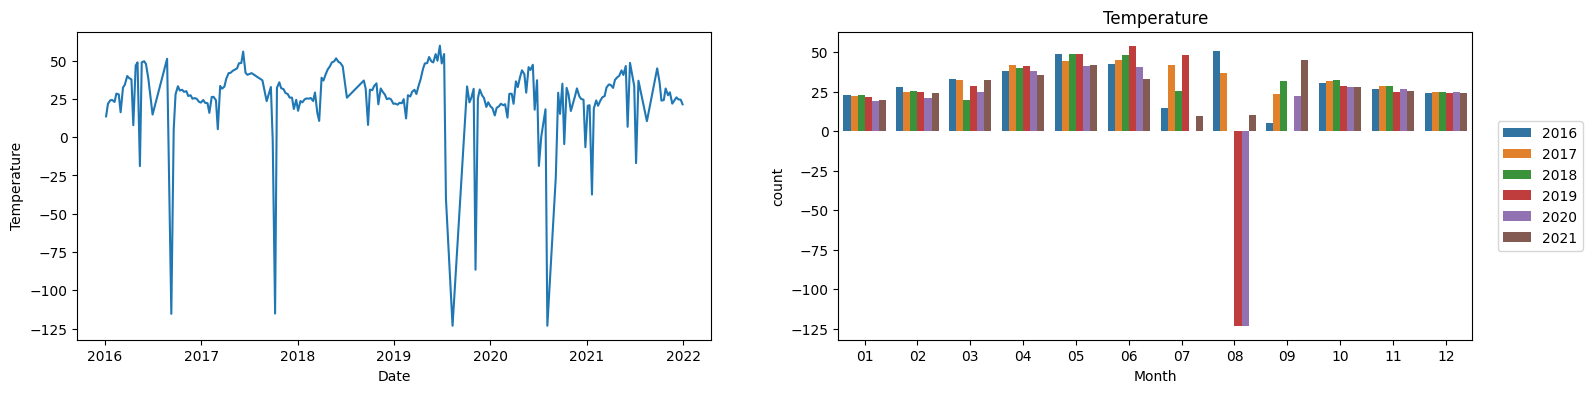

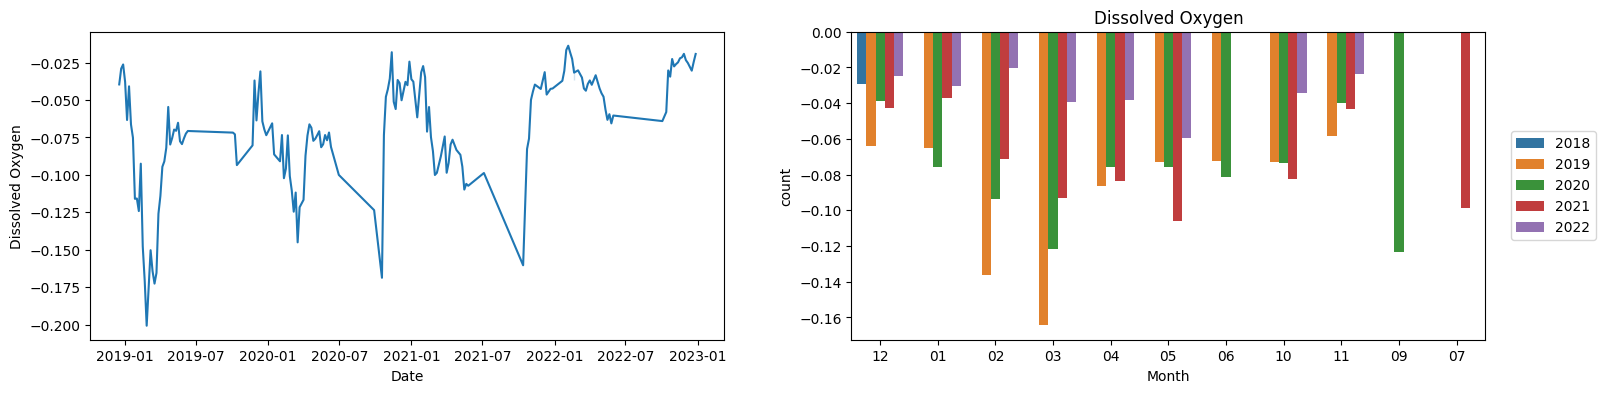

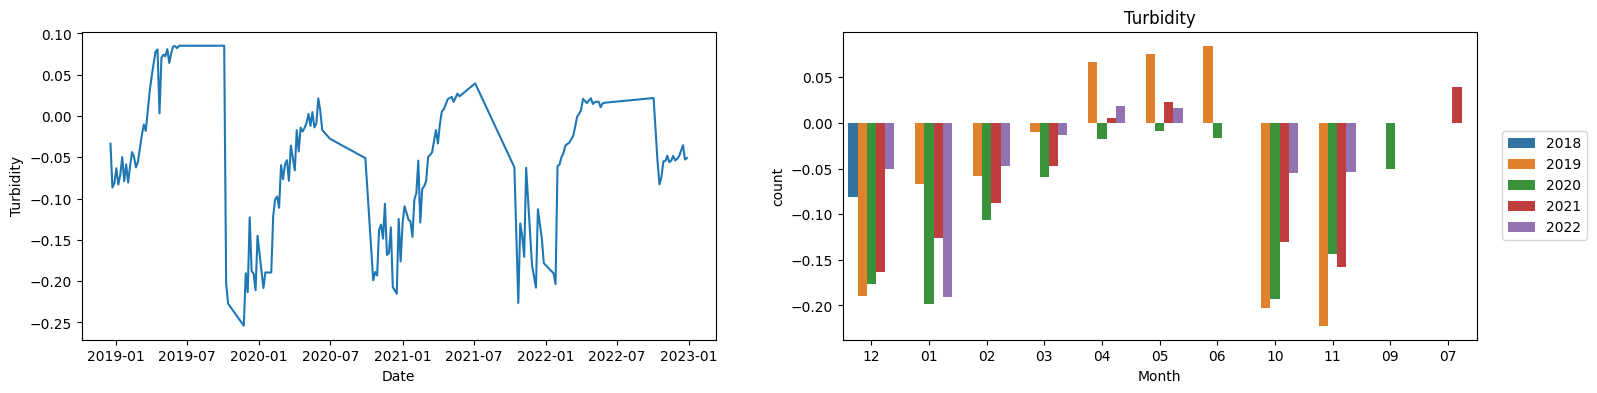

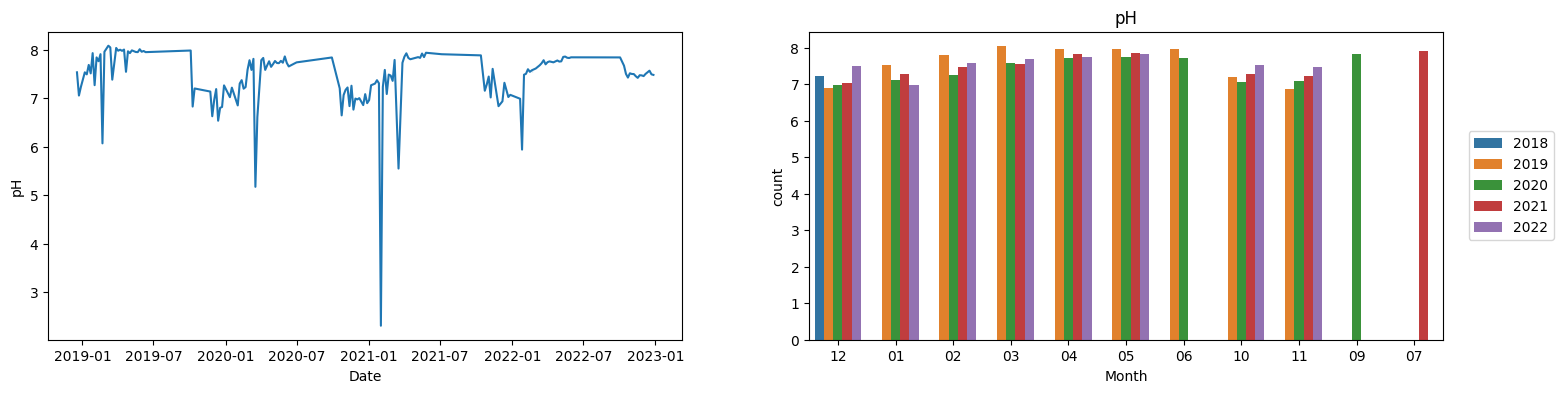

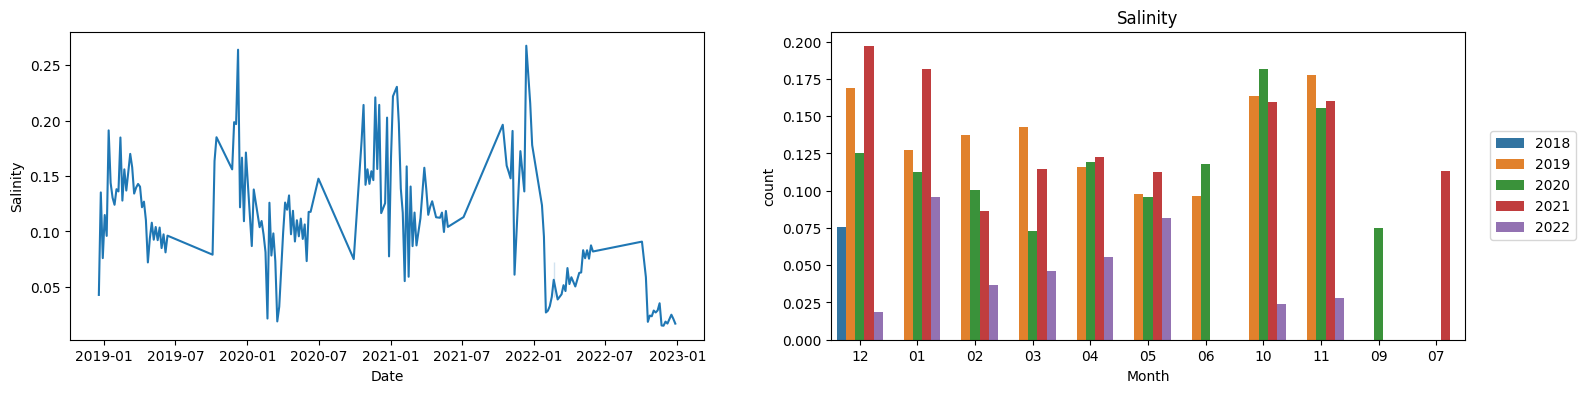

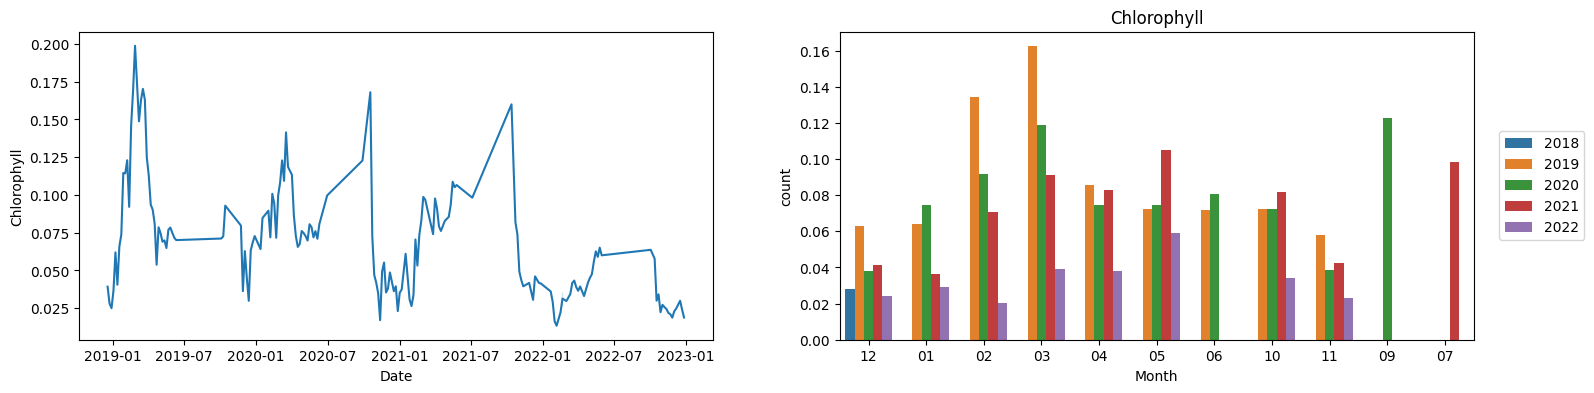

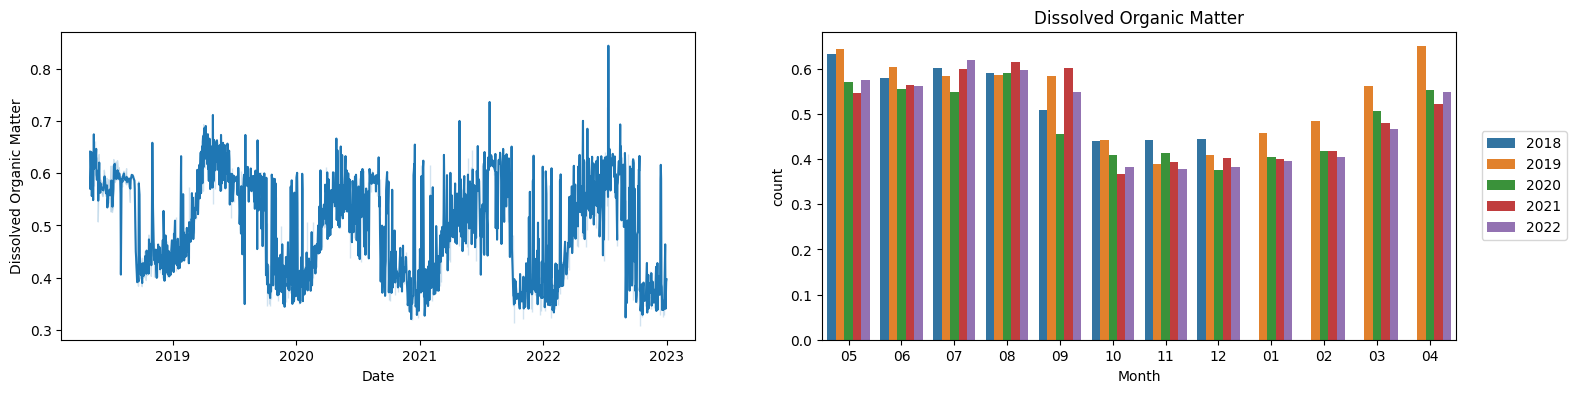

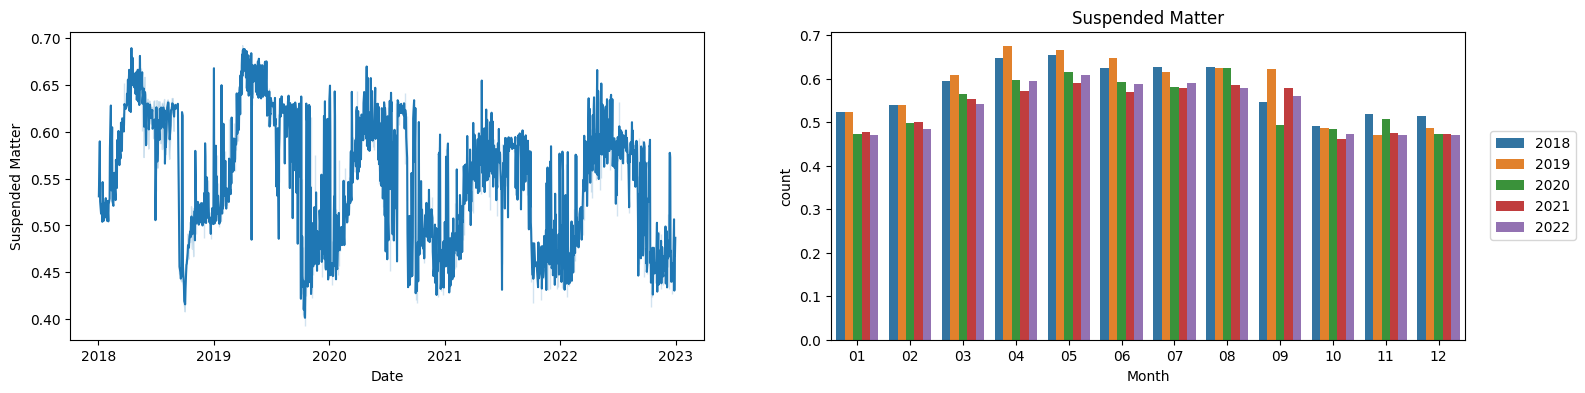

In [20]:
df_temp2 =plot_m(df_temp,'Temperature')
df_do2 = plot_m(df_do,'Dissolved Oxygen')
df_tb2 = plot_m(df_tb,'Turbidity')
df_ph2 = plot_m(df_ph,'pH')
df_sal2 =plot_m(df_sal,'Salinity')
df_ch2 = plot_m(df_ch,'Chlorophyll')
df_dom2 =plot_m(df_dom,'Dissolved Organic Matter')
df_sm2 = plot_m(df_sm,'Suspended Matter')


* Except for August temperature patterns across months seems to be coherent with expected seasonality with higher values in summer months.
* Dissolved Oxygen is all negative specialy for Feb, March and April
* Turbidity present most negative values, increasing to positive values for summer months
* pH seems to be constant across months
* Chlorophyl seems to be constant except for Feb, Mar and Apr
* Dissolved Organic Matter and Suspended Matter present seasonality decreasing values in the autumn and winter months


# Individual Plotting

In [21]:
def plot_scatter(df,column):
    fig = px.scatter(df, y=column,
                color='Year')
    plt.figsize=(18,4)
    fig.show()

In [22]:
plot_scatter(df_temp,'Temperature')
plot_scatter(df_do,'Dissolved Oxygen')
plot_scatter(df_tb,'Turbidity')
plot_scatter(df_ph,'pH')
plot_scatter(df_sal,'Salinity')
plot_scatter(df_ch,'Chlorophyll')
plot_scatter(df_dom,'Dissolved Organic Matter')
plot_scatter(df_sm,'Suspended Matter')

From the individual scatter plots in daily basis it is possible to observe that all variables present seasonalty cyles correlated with temperature yearly pattern. For pH this seasonality is more discrete.

# Individual plots after monthwise aggregate (median)

In [23]:
 
def plot_lines(df,column):
    fig = px.line(df, y=column,line_dash='Year',
                    color='Year')
    plt.figsize=(18,4)
    fig.show()

In [24]:
def aggreg_month(df):
    
    df = df.reset_index()
    df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
    df=df.set_index("Date")

    return df

In [25]:
df_temp2 = aggreg_month(df_temp2)
df_do2  = aggreg_month(df_do2)
df_ph2  =   aggreg_month(df_ph2)
df_tb2  =   aggreg_month(df_tb2)
df_ch2  =   aggreg_month(df_ch2)
df_sal2 =  aggreg_month(df_sal2)
df_sm2  =   aggreg_month(df_sm2)
df_dom2 =  aggreg_month(df_dom2)

In [26]:
plot_lines(df_temp2,'Temperature')
plot_lines(df_do2,'Dissolved Oxygen')
plot_lines(df_tb2,'Turbidity')
plot_lines(df_ph2,'pH')
plot_lines(df_sal2,'Salinity')
plot_lines(df_ch2,'Chlorophyll')
plot_lines(df_dom2,'Dissolved Organic Matter')
plot_lines(df_sm2,'Suspended Matter')

* Most of the parameters did not present a clear pattern changing pre and post COVID-19
* Chlorophyll and Suspended Matter present a decreasing trend after 2019
* Dissolved Oxygen present an incresing trend after 2020
* Temperature patter seems constant except for the outliers in Aug 2019 and Aug 2020
* The average Salinity for 2022 presents a high offset lower than the previous years

# Correlations for monthwise aggregate values (median)

In [27]:
df_temp2_ = df_temp2.loc['2019-01-01':'2022-01-01',:].copy()
df_do2_ = df_do2.loc['2019-01-01':'2022-01-01',:].copy()
df_ch2_ = df_ch2.loc['2019-01-01':'2022-01-01',:].copy()
df_tb2_ = df_tb2.loc['2019-01-01':'2022-01-01',:].copy()
df_sal2_ = df_sal2.loc['2019-01-01':'2022-01-01',:].copy()
df_ph2_ = df_ph2.loc['2019-01-01':'2022-01-01',:].copy()
df_dom2_ = df_dom2.loc['2019-01-01':'2022-01-01',:].copy()
df_sm2_ = df_sm2.loc['2019-01-01':'2022-01-01',:].copy()


In [29]:
(df_temp2_.shape[0],
df_do2_.shape[0], 
df_ph2_.shape[0], 
df_tb2_.shape[0], 
df_ch2_.shape[0], 
df_sal2_.shape[0],
df_sm2_.shape[0],
df_dom2_.shape[0])

(35, 29, 29, 29, 29, 29, 37, 37)

In [44]:
df_corr = pd.concat([df_temp2_, df_do2_,df_ph2_, df_tb2_, df_ch2_, df_sal2_,df_sm2_,df_dom2_], axis=1)

In [46]:
df_corr.columns

Index(['Year', 'Month', 'Temperature', 'Year', 'Month', 'Dissolved Oxygen',
       'Year', 'Month', 'pH', 'Year', 'Month', 'Turbidity', 'Year', 'Month',
       'Chlorophyll', 'Year', 'Month', 'Salinity', 'Year', 'Month',
       'Suspended Matter', 'Year', 'Month', 'Dissolved Organic Matter'],
      dtype='object')

In [48]:
df_corr = df_corr[['Temperature',  'Dissolved Oxygen',
        'pH',  'Turbidity', 'Chlorophyll',  'Salinity','Suspended Matter','Dissolved Organic Matter']].copy()

<AxesSubplot: >

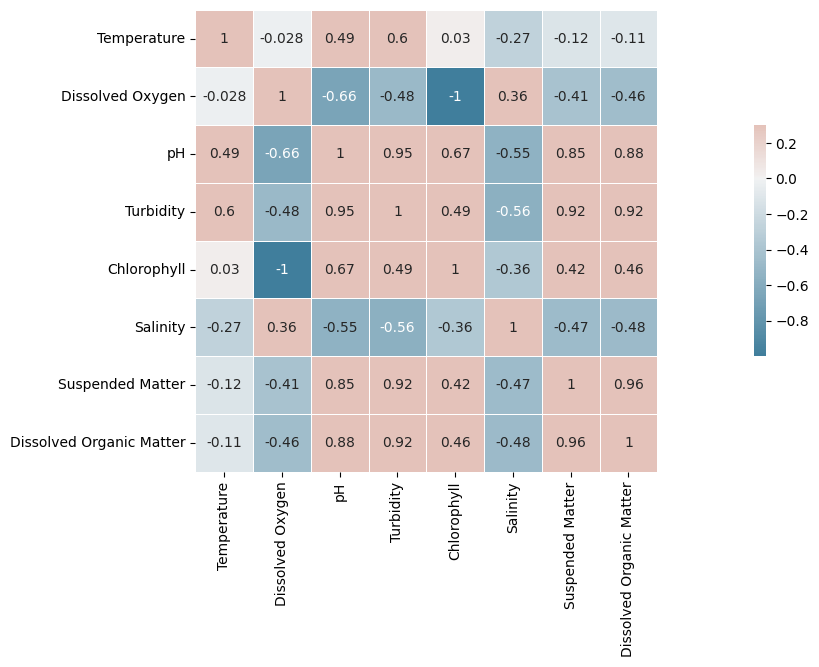

In [49]:
plt.figure(figsize=(25,6))
sns.heatmap(df_corr.corr(),annot=True,cmap=sns.diverging_palette(230, 20, as_cmap=True),vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

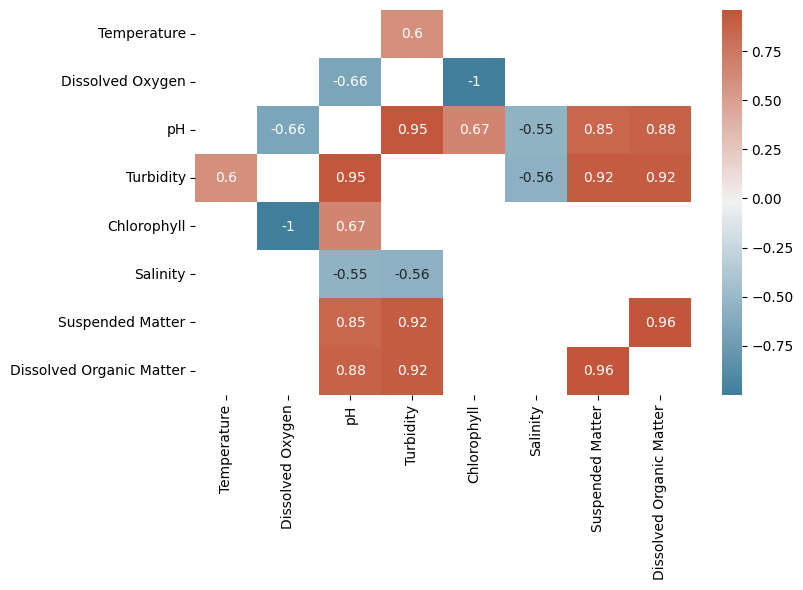

In [50]:
dfCorr = df_corr.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,5))
sns.heatmap(filteredDf, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.show()

* Temperature presented mild correlation with Turbidity
* Dissolved Oxygen presented mild negative correlation with pH and strongly negative correlation with Chlorophyll
* pH presented no correlation with temperature and is highly correlated with all other variables
* Turbidity is strongly correlated with pH and Suspended and Organic Matter and mild correlation with Temperature
* Suspended and Organic Matter are strogngly correlated themselves and with pH and Turbidity
* Salinity is highly correlated with pH and Turbidity